In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 50% !important; height: 50% !important;} </style>" 

In [2]:


train_iris = pd.read_csv('C:\\programmer_shit\\data_salo_files\\stepic\\train_iris.csv' , index_col = 0)
train_iris

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,2
124,6.7,3.3,5.7,2.1,2
123,6.3,2.7,4.9,1.8,2
146,6.3,2.5,5.0,1.9,2


In [3]:
test_iris = pd.read_csv('C:\\programmer_shit\\data_salo_files\\stepic\\test_iris.csv' , index_col = 0)
test_iris.head()

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0


In [4]:
y = train_iris.species

X = train_iris.drop(["species"] , axis = 1)
# X = pd.get_dummies(X)
# X = X.drop(["Sex_female"] , axis = 1)
# X = X.fillna({"Age": X.Age.median()})
X.isnull().sum()



sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64

In [5]:
X_test_iris = test_iris.drop(["species"] , axis = 1)
y_test_iris = test_iris.species

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

max_depth_values = range(1,100)

score_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_valid_score = clf.score(X_test, y_test)
    test_score = clf.score(X_test_iris, y_test_iris)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_valid_score': [test_valid_score],
                                    'test_score': [test_score],
                                   'cross_val_score' : [mean_cross_val_score]})
    
    score_data = score_data.append(temp_score_data)
    
    
score_data




,max_depth,train_score,test_valid_score,test_score,cross_val_score
0,1,0.716418,0.666667,0.60,0.716484
0,2,0.970149,0.969697,0.94,0.939560
0,3,0.985075,1.000000,0.94,0.939560
0,4,1.000000,1.000000,0.92,0.939560
0,5,1.000000,1.000000,0.92,0.939560
...,...,...,...,...,...
0,95,1.000000,1.000000,0.92,0.939560
0,96,1.000000,1.000000,0.94,0.939560
0,97,1.000000,1.000000,0.92,0.939560
0,98,1.000000,1.000000,0.94,0.939560


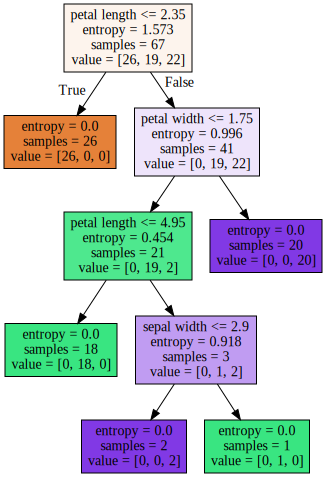

In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

clf.fit(X_train, y_train)
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X_train), filled=True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
clf.predict(X_test)
